# Lithium Oven Optic 6

In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
from ionization import ionization
from lens import profile
from lens import design
import matplotlib.pyplot as plt
plt.style.use('notes')
%load_ext autoreload
%autoreload 2

path = '/mnt/md0/Data/rariniello/Lithium_Oven/Lithium_Oven_Optic_6/'
lam = 0.796
# All length units are in um

Desciption of the optic. Optic 6 is meant to be the first iteration we actually make a physical version of.

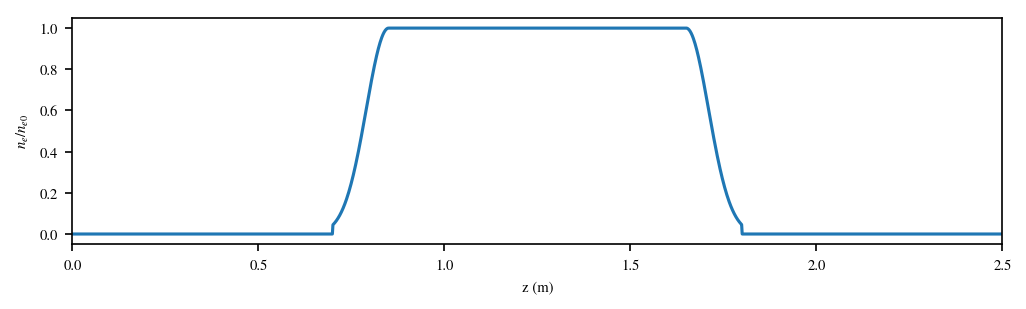

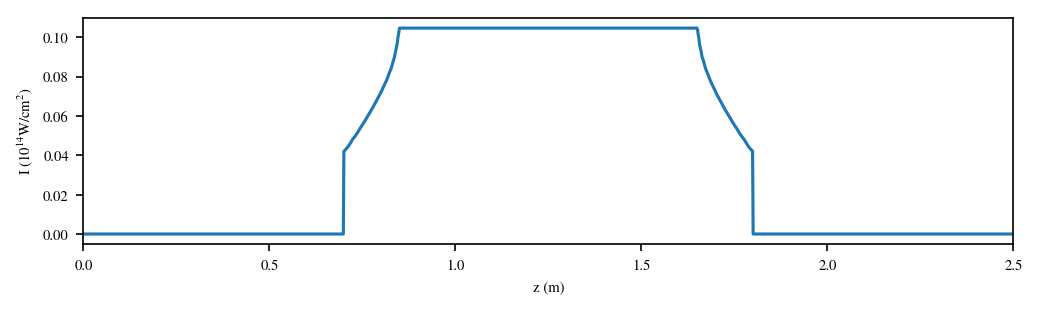

Plasma starts at 0.32m and ends at 2.25m


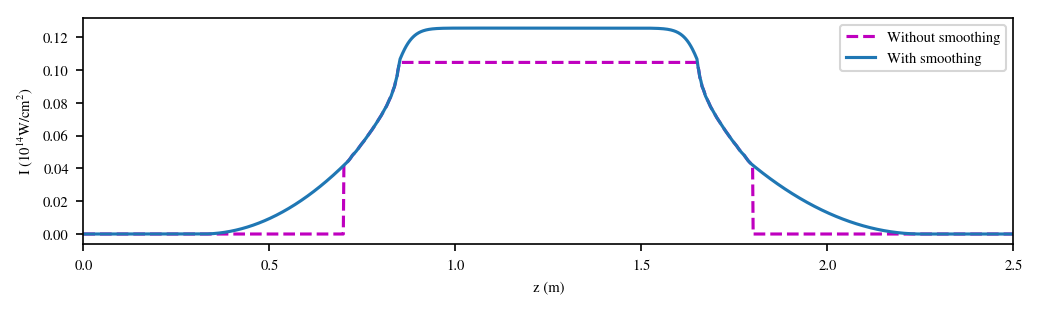

In [2]:
length = 80e4
width = 75
Nz = 2**16
Z = 100e6
z0 = 0.85e6
xlim = [0, 2.5]
tau = 30 # RMS pulse length in fs
ion = {'atom' : ionization.Li,
       'tau' : tau,
       'type' : 'gaussian'}
z, I_la = profile.cutoff_gaussian_intensity(Nz, Z, z0, length, 15e4, 6e4, 15e4, 6e4, ion, 8, 0.4, path, xlim)

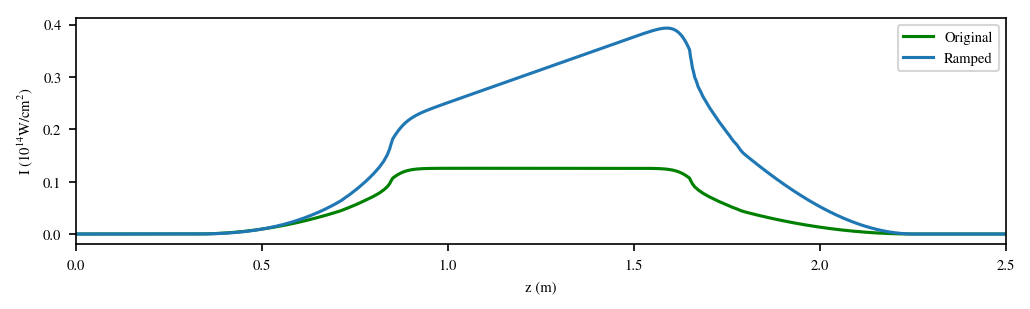

In [ ]:
# Add a ramped intensity profile
I_ramped = abs(2*I_la*(1e-6*(z-1e6)+1))
plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, I_la, 'g')
plt.plot(z/1e6, I_ramped)
plt.legend(['Original', 'Ramped'])
plt.xlabel(r'z (m)')
plt.ylabel(r'I ($\mathrm{10^{14}W/cm^2}$)')
plt.xlim(xlim)
plt.show()

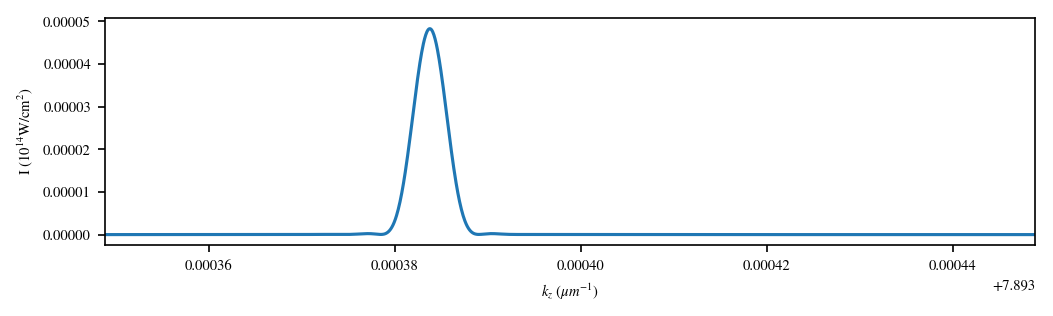

In [ ]:
r, E = design.calculate_tran_field(z, I_ramped, 20e3, width, lam, path, 10e-5, xlim, [0, 12])

In [ ]:
# Create the gas density the laser is going into
ne0 = 3.4e16/1e17
start, n_plot, n = profile.lithium_oven_profile(z, 1.25e6, ne0)

In [ ]:
X = 20e3
Nx = 2**13
beam0, pulseParams = design.propagate_to_start(r, E, start, X, Nx, path, lam, tau, 20, [-1, 1])

In [1]:
from numpy.fft import fft, ifft, fftfreq, fftshift
k_xy = beam0.fft(beam0.e[:, :])
k_xy = fftshift(k_xy)
k = -fftfreq(beam0.Nx, beam0.X/(beam0.Nx-1))[-1]*1000
ext = [-k, k, -k, k]

plt.figure(figsize=(12, 4), dpi=150)
plt.subplot(121)
plt.imshow(abs(k_xy)/beam0.Nx, aspect='auto', extent=ext)
cb = plt.colorbar()
cb.set_label(r'Intensity ($10^{14}\,\mathrm{W/cm^2}$)')
plt.set_cmap('viridis')
plt.xlim(-0.0125, 0.0125)
plt.ylim(-0.0125, 0.0125)
plt.show()

NameError: name 'beam0' is not defined

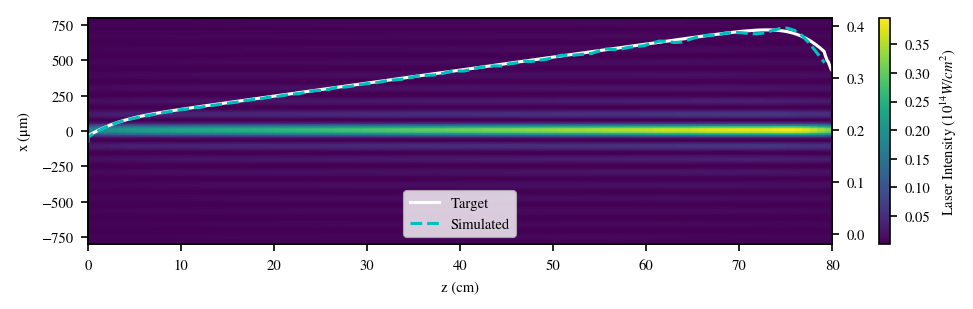

In [ ]:
Nx = 2**11
Nz = 100
X = 10e3
Z = 80e4
design.domain_test(X, Nx, Z, Nz, beam0, pulseParams, z, I_ramped, start, [-800, 800])

In [ ]:
Nx = 2**11
X = 10e3
Nz = 400
Z = 80e4
ext = [0, Z/1e4, -X/2, X/2]
pulse, I, ne = design.plasma_refraction(X, Nx, Z, Nz, beam0, pulseParams, ionization.Li, n, start, 2)
design.plot_plasma_density(pulse, ne, ne0, ext, lines=[20, 40, 60])

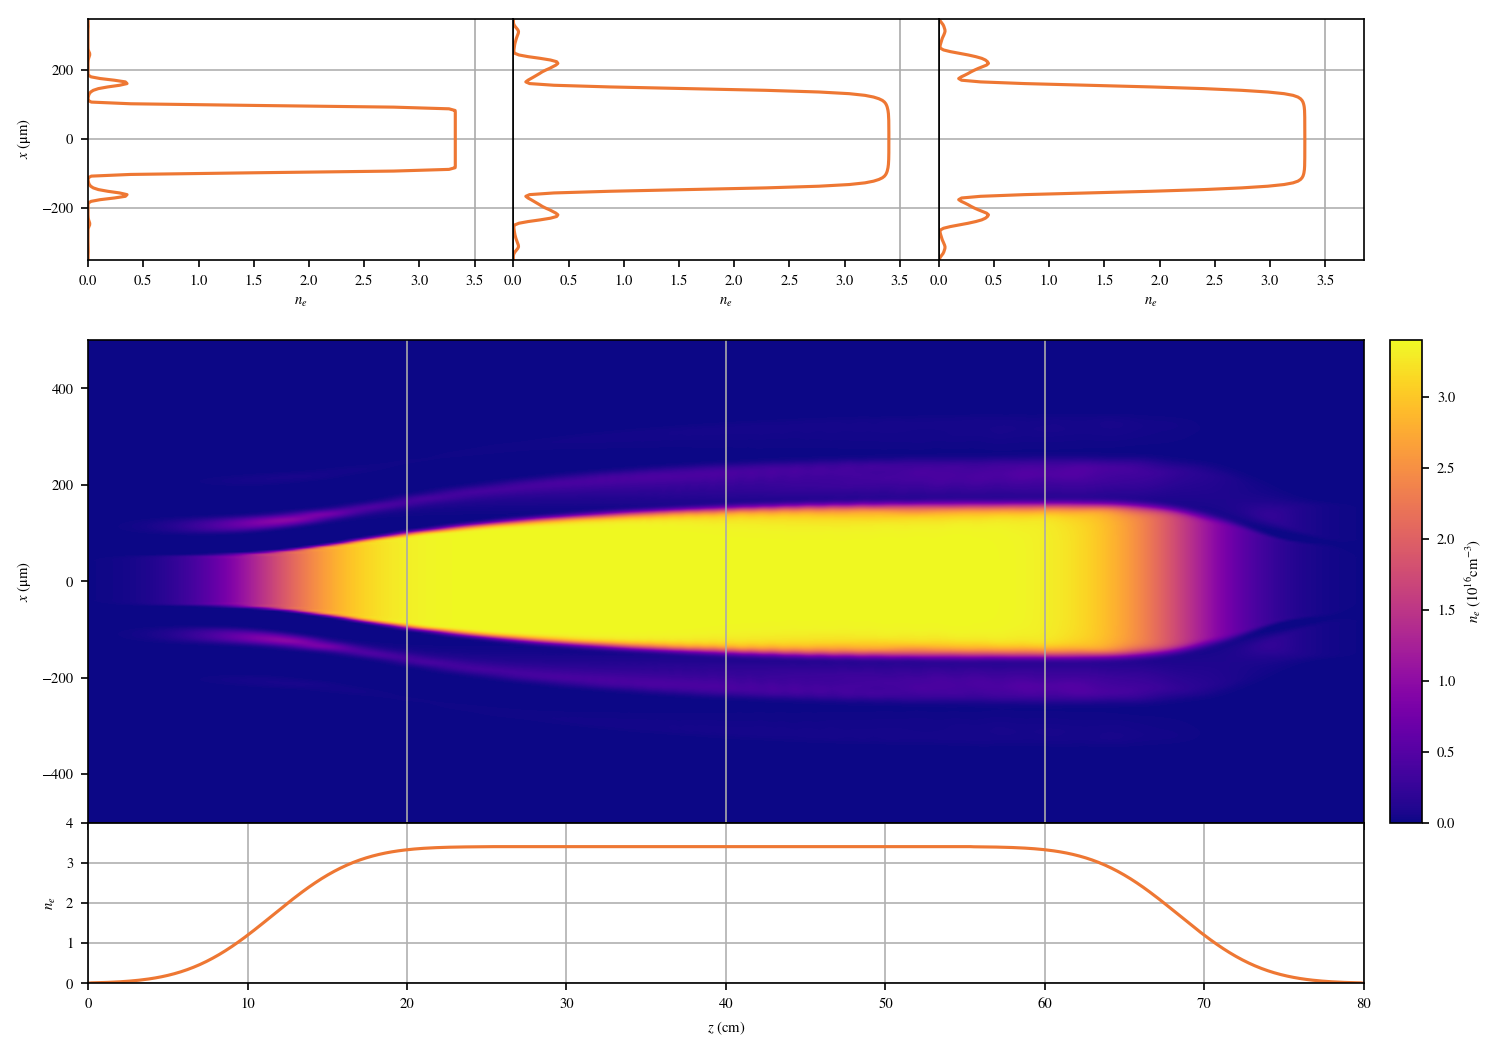

In [10]:
design.plot_plasma_density(pulse, ne, ne0, ext, lines=[20, 40, 60])

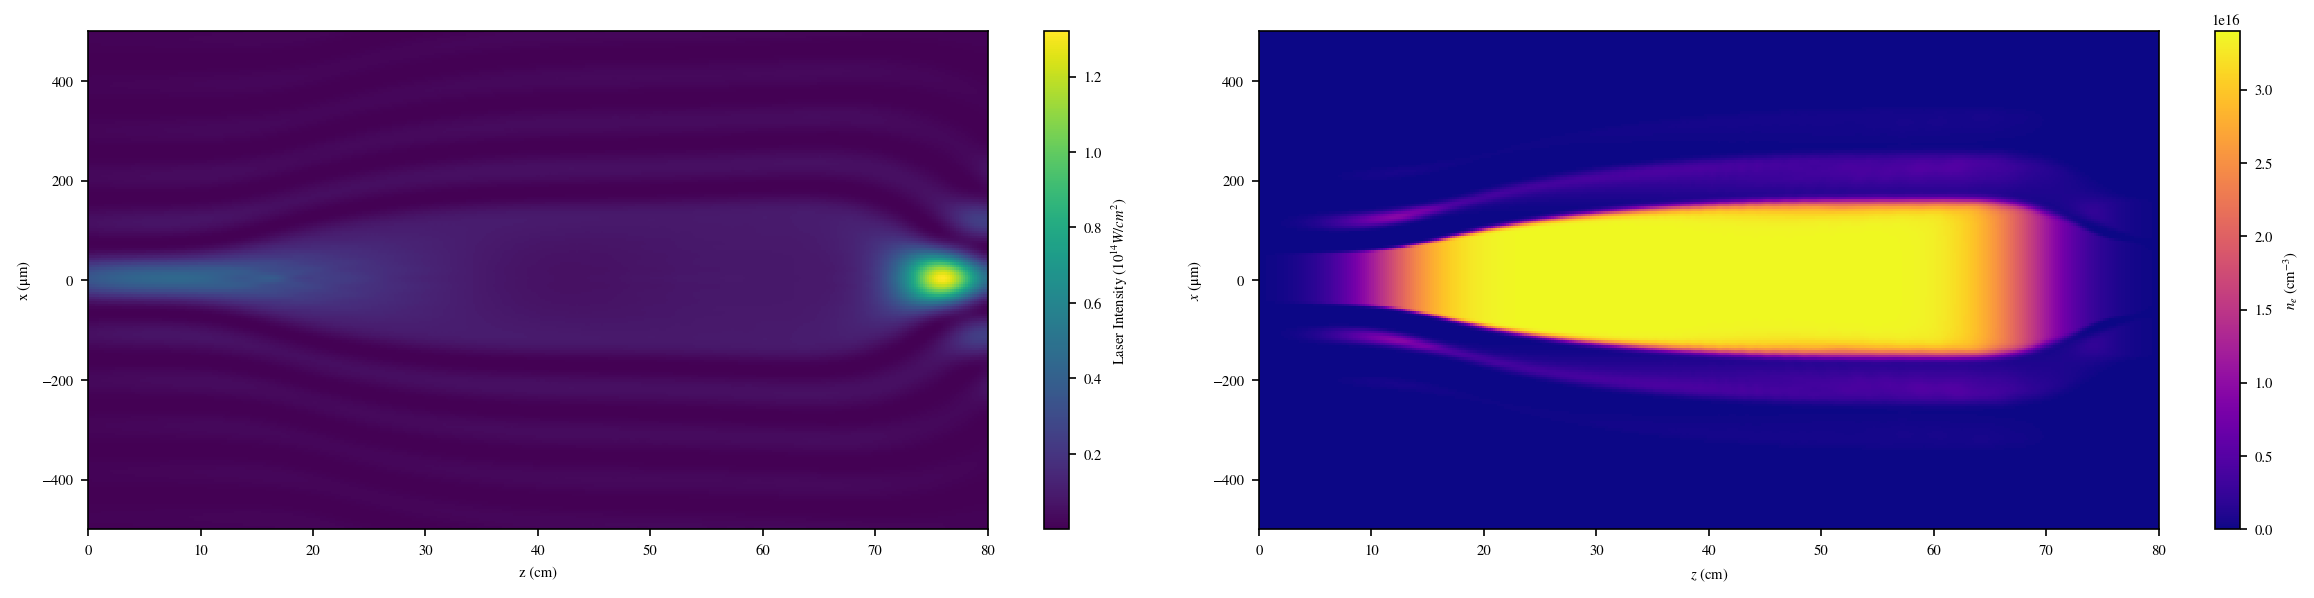

In [11]:
design.plot_laser_plasma(I, ne, ext)